# Qbitorrent avec Google Drive avec Ngrok

### Monter Google Drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

### Monter le serveur qBittorrent


In [ ]:
!add-apt-repository ppa:qbittorrent-team/qbittorrent-stable -y
!apt install qbittorrent-nox

### Démarrer le serveur et créer un tunnel sécurisé avec Ngrok
TOKEN déjà présent: 1 connection par utilisateur.

Récupérer et remplacer avec votre Token personnel sur le site https://dashboard.ngrok.com/login


In [ ]:
TOKEN = "1ow4uFTm7lTzW3ZH0xA2yK2GYnj_2JAs7KBN7gwB6pjPSR67g"

def install_ngrok():
    import os
    from zipfile import ZipFile
    from urllib.request import urlretrieve
    
    url = 'https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip'
    urlretrieve(url, 'ngrok-amd64.zip')
    
    with ZipFile('ngrok-amd64.zip', 'r') as zip_ref:
        zip_ref.extractall('/usr/local/bin/')
    os.chmod('/usr/local/bin/ngrok', 0o755)
    os.unlink('ngrok-amd64.zip')

install_ngrok()
if TOKEN != "":
    !ngrok authtoken $TOKEN 

In [ ]:
import threading
import time
import requests
import json
import subprocess

def torrent(port):
    command = subprocess.Popen(['qbittorrent-nox', f'--webui-port={port}'])

def ngrok(port):
    
    ngrok_cmd = subprocess.Popen(['ngrok', 'http', str(port)])    
    localhost_url = "http://localhost:4040/api/tunnels"

    time.sleep(1)
    tunnel_url = requests.get(localhost_url).text
    json_data = json.loads(tunnel_url)

    tunnel_url = json_data['tunnels'][0]['public_url']
    tunnel_url = tunnel_url.replace("https", "http")
    print('Running at localhost: ' + str(port))
    print(tunnel_url)

if __name__ == '__main__':
    
    port = 9999

    thread_torrent = threading.Thread(target = torrent, args=(int(port),))
    thread_ngrok = threading.Thread(target = ngrok, args=(int(port),))

    thread_torrent.start()
    print('Torrent server started!')

    time.sleep(5)
    print('Establishing secure connection!')
    
    thread_ngrok.start()
    print('Secure connection established...')
    print('Username: admin')
    print('password: adminadmin')
    
    thread_ngrok.join()
    thread_torrent.join()

### Initialiser la Session d'upload de fichier dans le chemin :
### /content/drive/MyDrive (15 go Max)  ou  /content/drive/Shareddrives/votre_nom_team_drive (illimité)
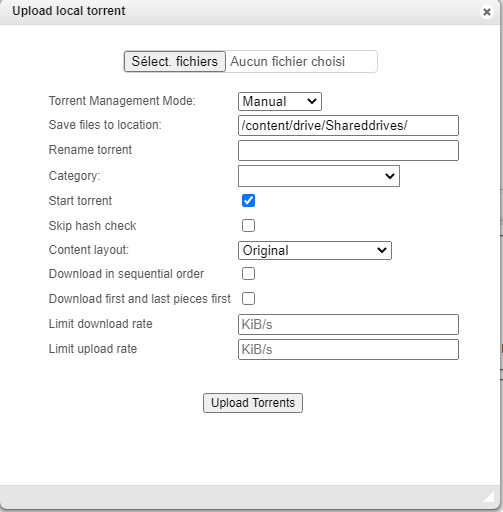
